In [81]:
import pandas as pd
import numpy as np
import umap
from sklearn.decomposition import PCA
import skbio.stats.composition
import numba
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(figsize=(12, 12))




In [53]:
tnfs = pd.read_csv('/lustre/scratch/microbiome/n10853499/98-CAMI/08-human_toy/CAMI_uro/binning/data/rosella_bins/rosella_kmer_table.tsv', sep='\t')
tnfs.shape
gsa = pd.read_csv('/lustre/scratch/microbiome/n10853499/98-CAMI/08-human_toy/CAMI_uro/hybrid/pooled/gsa_pooled_mapping.tsv', sep='\t')
gsa = gsa.rename(columns={'#anonymous_contig_id': 'contigName'})


In [54]:
gsa

,contigName,genome_id,tax_id,contig_id,number_reads,start_position,end_position
0,PC2272,OTU_97.4600.0,1311,CP007571.1,NaN,124,375
1,PC2010,OTU_97.4600.0,1311,CP007571.1,NaN,1068,4325
2,PC22041,OTU_97.4600.0,1311,CP007571.1,NaN,4916,5210
3,PC12394,OTU_97.4600.0,1311,CP007571.1,NaN,5396,5686
4,PC37515,OTU_97.4600.0,1311,CP007571.1,NaN,5759,5908
...,...,...,...,...,...,...,...
51133,PC1273,OTU_97.29802.0,1604,CP002561.1,NaN,2,12502
51134,PC3212,OTU_97.90.0,525284,CP002104.1,NaN,1,1667350
51135,PC44674,OTU_97.36508.0,246787,CP012801.1,NaN,1,7084821
51136,PC4988,OTU_97.43290.1,1254,CP015206.1,NaN,6,2131333


In [32]:
tnfs.iloc[:, 2:] = tnfs.iloc[:, 2:].div(tnfs.iloc[:, 2:].sum(axis=1), axis=0)
tnfs.iloc[:, 2:] = skbio.stats.composition.clr(tnfs.iloc[:, 2:].astype(np.float64) + 1)
## Set custom log base change for lengths
log_lengths = np.log(tnfs['contigLen']) / np.log(tnfs['contigLen'].mean())

In [62]:
all_info = pd.merge(tnfs, gsa[gsa['contigName'].isin(tnfs['contigName'])], on='contigName')
all_info

,contigName,contigLen,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,...,TCGA,TGAA,TGCA,TTAA,genome_id,tax_id,contig_id,number_reads,start_position,end_position
0,PC2010,3258,106,45,57,86,50,22,16,47,...,6,51,5,23,OTU_97.4600.0,1311,CP007571.1,NaN,1068,4325
1,PC4763,5698,219,82,92,156,81,38,33,72,...,11,85,28,56,OTU_97.4600.0,1311,CP007571.1,NaN,6224,11921
2,PC47866,3714,137,44,62,114,46,25,9,53,...,5,52,15,41,OTU_97.4600.0,1311,CP007571.1,NaN,12072,15785
3,PC5135,7881,65,61,71,71,55,96,57,75,...,34,56,12,44,OTU_97.4600.0,1311,CP007571.1,NaN,22087,29967
4,PC32684,2501,58,26,40,48,38,20,11,37,...,7,30,9,22,OTU_97.4600.0,1311,CP007571.1,NaN,30077,32577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,PC1273,12501,364,135,208,291,119,86,73,117,...,40,153,58,111,OTU_97.29802.0,1604,CP002561.1,NaN,2,12502
12657,PC3212,1667350,37686,20299,23081,28811,22649,10081,13691,15194,...,3729,16387,11152,11847,OTU_97.90.0,525284,CP002104.1,NaN,1,1667350
12658,PC44674,7084821,122116,75615,107066,102686,70050,50498,47416,60820,...,15480,100293,32557,25665,OTU_97.36508.0,246787,CP012801.1,NaN,1,7084821
12659,PC4988,2131328,56499,27812,28322,43446,19383,22751,24084,23877,...,6799,26963,7025,21800,OTU_97.43290.1,1254,CP015206.1,NaN,6,2131333


In [93]:
# Run PCA
tnf_pca = PCA(n_components=10, svd_solver='full')
tnf_pca.fit(tnfs.iloc[:, 2:].T)

PCA(n_components=10, svd_solver='full')

In [94]:
tnf_pca = pd.DataFrame(tnf_pca.components_.T)
tnf_pca = pd.concat([tnf_pca,  all_info['genome_id']], axis=1)

In [95]:
tnf_pca

,0,1,2,3,4,5,6,7,8,9,genome_id
0,-0.000070,0.000110,0.000070,0.000017,-0.000039,-0.000130,0.000013,0.000108,0.000040,0.000011,OTU_97.4600.0
1,-0.000131,0.000228,0.000144,-0.000051,-0.000052,-0.000035,0.000150,0.000110,-0.000003,-0.000077,OTU_97.4600.0
2,-0.000096,0.000152,0.000156,0.000012,-0.000025,-0.000014,-0.000005,0.000038,-0.000082,0.000051,OTU_97.4600.0
3,-0.000005,0.000028,-0.000027,0.000072,0.000021,-0.000479,-0.000118,0.000238,0.000004,0.000177,OTU_97.4600.0
4,-0.000039,0.000074,-0.000011,0.000024,0.000047,0.000093,0.000073,0.000197,0.000078,0.000133,OTU_97.4600.0
...,...,...,...,...,...,...,...,...,...,...,...
12656,-0.000225,0.000410,0.000224,-0.000063,-0.000142,0.000103,0.000123,0.000026,-0.000223,-0.000015,OTU_97.29802.0
12657,-0.017202,0.047963,-0.001101,-0.004144,-0.066288,0.063094,0.035004,0.091435,0.037200,0.066411,OTU_97.90.0
12658,-0.064158,0.165700,0.022408,0.068196,-0.389446,-0.097759,-0.522054,-0.108226,-0.125822,0.010503,OTU_97.36508.0
12659,-0.021716,0.063512,-0.019904,-0.025604,0.046692,-0.076058,0.004549,0.040984,0.078811,0.017969,OTU_97.43290.1


/home/n10853499/.conda/envs/r-3.6.3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


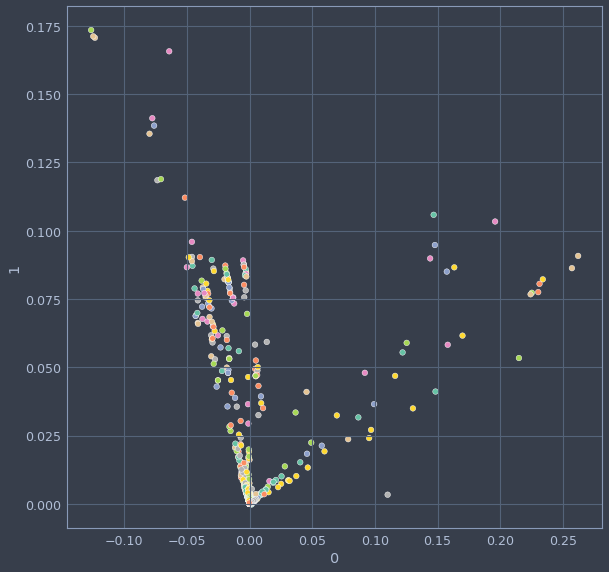

In [96]:
import seaborn as sns
# Get Unique continents
color_labels = tnf_pca['genome_id'].unique()

# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", 1000)

# Map continents to the colors
color_map = dict(zip(color_labels, rgb_values))
sns.scatterplot(tnf_pca.iloc[:, 0], tnf_pca.iloc[:, 1], c=tnf_pca['genome_id'].map(color_map))
plt.show()
# fig = plt.figure()
# ax = fig.add_subplot(111)
# scatter = ax.scatter(
#     *tnf_pca.components_[0:2], 
# #     two_embedding[:, 2],
#     s=5, linewidth=0, alpha=0.5, c=all_info['genome_id'])
# legend = ax.legend(*scatter.legend_elements(), loc="upper left")
# ax.add_artist(legend)

In [91]:
tnf_pca.iloc[:, 1].max()

0.1734769802831314

In [35]:
reducer = umap.UMAP(
    metric=rho,
    n_neighbors=100,
    n_components=10,
#     min_dist=0,
    # local_connectivity=5,
#     disconnection_distance=0.9,
#     set_op_mix_ratio=0.01,
#     random_state=random_state,
    n_epochs=500,
#     spread=0.5,
#     a=a,
#     b=b,
)

In [36]:
embeddings = reducer.fit(np.concatenate((log_lengths.values[:, None], tnfs.iloc[:, 2:]), axis = 1))

/home/n10853499/.conda/envs/r-3.6.3/lib/python3.6/site-packages/umap/umap_.py:1496: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  "custom distance metric does not return gradient; inverse_transform will be unavailable. "


In [98]:
embeddings_ = pd.DataFrame(embeddings.embedding_)
embeddings_ = pd.concat([embeddings_,  all_info['genome_id']], axis=1)

/home/n10853499/.conda/envs/r-3.6.3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


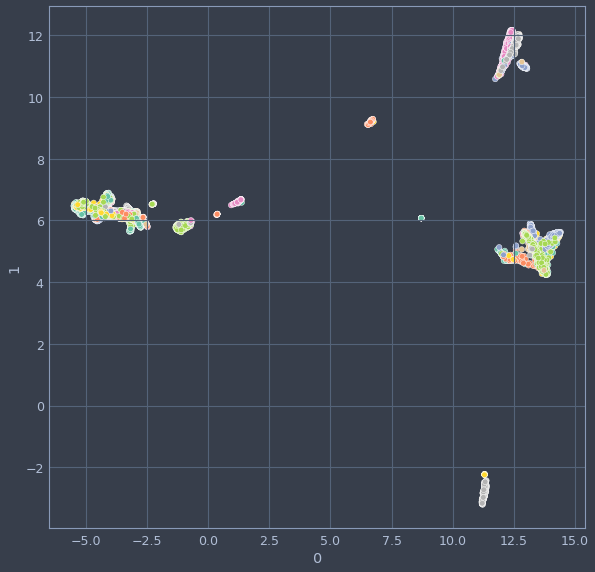

In [99]:
# Get Unique continents
color_labels = embeddings_['genome_id'].unique()

# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", 1000)

# Map continents to the colors
color_map = dict(zip(color_labels, rgb_values))
sns.scatterplot(embeddings_.iloc[:, 0], embeddings_.iloc[:, 1], c=embeddings_['genome_id'].map(color_map))
plt.show()

In [26]:
embeddings.embedding_.shape

(12847, 10)

In [21]:
np.concatenate((log_lengths.values[:, None], tnfs.iloc[:, 2:]), axis = 1).shape

(12847, 137)

In [22]:
tnf_pca.components_[0:2].shape

(2, 136)

In [6]:
@numba.njit(fastmath=True)
def rho(a, b):
    """
    a - CLR transformed coverage distribution vector a
    b - CLR transformed coverage distribution vector b

    return - This is a transformed, inversed version of rho. Normal those -1 <= rho <= 1
    transformed rho: 0 <= rho <= 2, where 0 is perfect concordance
    """

    rp =  max(max(a[0], b[0]), 1)
    # l = 0
    x = a[1:]
    y = b[1:]
    mu_x = 0.0
    mu_y = 0.0
    norm_x = 0.0
    norm_y = 0.0
    dot_product = 0.0

    for i in range(x.shape[0]):
        mu_x += x[i]
        mu_y += y[i]

    mu_x /= x.shape[0]
    mu_y /= x.shape[0]

    for i in range(x.shape[0]):
        shifted_x = x[i] - mu_x
        shifted_y = y[i] - mu_y
        norm_x += shifted_x ** 2
        norm_y += shifted_y ** 2
        dot_product += shifted_x * shifted_y
    
    norm_x = norm_x / (x.shape[0] - 1)
    norm_y = norm_y / (x.shape[0] - 1)
    dot_product = dot_product / (x.shape[0] - 1)
    vlr = -2 * dot_product + norm_x + norm_y
    rho = 1 - vlr / (norm_x + norm_y)
    rho += 1
    rho = 2 - rho
    
    return rho * rp